# The Delta-Method

## Description

Let $X_1,X_2,...$ be independent uniform random variables: 
$$
X_i\sim \mathcal{U}(0,1), \quad i=1,...,n.
$$
We have 
$$
\mu = E(X_i) = \frac{1}{2} \quad \textrm{ and } \quad \sigma^2=V(X_i) = \frac{(b-a)^2}{12},
$$
for $i=1,...,n$.
Let $n$ be an integer and let $Y_n$ be the average:
$$
Y_n = \frac{1}{n}\sum_{i=1}^n X_i.
$$
By the T.C.L., we have:
$$
Y_n \xrightarrow{D} \mathcal{N}\left(\mu,\frac{\sigma^2}{n}\right).
$$
This implies:
$$
Y_n - \mu \xrightarrow{D} \mathcal{N}\left(0,\frac{\sigma^2}{n}\right)
$$
and leads to:
$$
\sqrt{n}(Y_n - \mu) \xrightarrow{D} \mathcal{N}\left(0,\sigma^2\right).
$$

Let $g$ be the function:
$$
g(y)=y^2+y+1
$$
for $y\in\mathbb{R}$.
The derivative is:
$$
g'(y) = 2y+1,
$$
for $y\in\mathbb{R}$.
According to the Delta-method theorem, we have:
$$
\sqrt{n}(g(Y_n) - g(\mu)) \xrightarrow{D} \mathcal{N}\left(0,\sigma^2g'(\mu)^2\right).
$$
This implies:
$$
g(Y_n) - g(\mu) \xrightarrow{D} \mathcal{N}\left(0,\frac{\sigma^2g'(\mu)^2}{n}\right).
$$
Therefore:
$$
g(Y_n) \xrightarrow{D} \mathcal{N}\left(g(\mu),\frac{\sigma^2g'(\mu)^2}{n}\right).
$$


By hypothesis:
$$
g(\mu) = \mu^2+\mu+1 \quad \textrm{ and } g'(\mu)=2\mu+1.
$$
Therefore, 
$$
\sqrt{n}\left(g(Y_n) - (\mu^2+\mu+1)\right) \xrightarrow{D} \mathcal{N}\left(0,\sigma^2 (2\mu+1)^2\right).
$$
This implies:
$$
g(Y_n) - (\mu^2+\mu+1) \xrightarrow{D} \mathcal{N}\left(0,\frac{\sigma^2 (2\mu+1)^2}{n}\right).
$$
which leads to:
$$
g(Y_n) \xrightarrow{D} \mathcal{N}\left(\mu^2+\mu+1,\frac{\sigma^2 (2\mu+1)^2}{n}\right).
$$




## Experiments

In [1]:
import openturns as ot
import numpy as np

Create the sequence Yn. 

In [2]:
a = 2.
b = 4.
X=ot.Uniform(a,b)
X.setDescription("X")

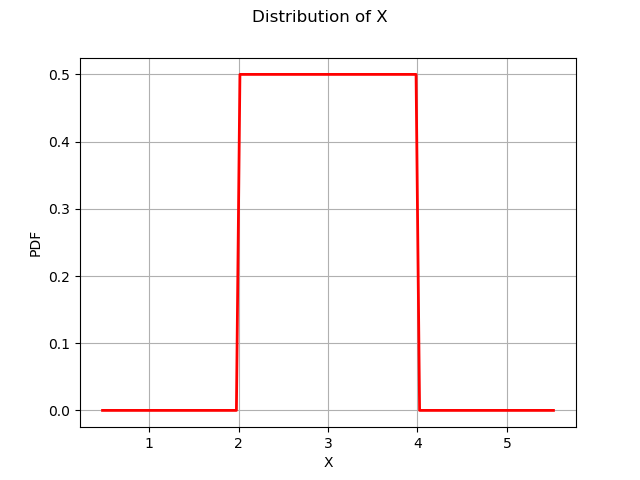

In [3]:
graph = X.drawPDF()
graph.setTitle("Distribution of X")
graph.setLegends([""])
graph

In [4]:
def generateYn(size):    
    sample = X.getSample(size)
    Yn = sample.computeMean()[0]
    return Yn

size = 10
generateYn(size)

2.9553247319531986

In order to plot the distribution of $Y_n$, get a sample.

In [5]:
m = 10000
t = ot.Sample(m,1)
for i in range(m):
    t[i,0] = generateYn(size)

Compute the exact moments of $Y_n$, according to the T.C.L..

In [6]:
muX = X.getMean()[0]
sigmaX = X.getStandardDeviation()[0]
muYn = muX
sigmaYn = sigmaX/np.sqrt(size)
gaussExact = ot.Normal(muYn,sigmaYn)
gaussExact.setDescription(["Yn"])

Shows the distribution of $Y_n$: compare histogram and the exact gaussian distribution.

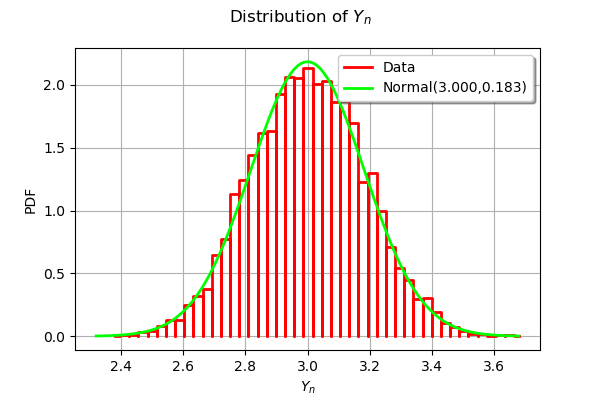

In [7]:
graph = ot.VisualTest_DrawHistogram(t)
graphNExact = gaussExact.drawPDF()
graphNExact.setColors(["green"])
graph.add(graphNExact)
graph.setLegends(["Data","Normal(%.3f,%.3f)"%(muYn,sigmaYn)])
graph.setTitle("Distribution of $Y_n$")
graph.setXTitle("$Y_n$")
graph.setYTitle("PDF")
graph

In [8]:
def g(y):
    return y**2+y+1

def gderivative(y):
    return 2*y+1

In [9]:
def generategYn(size):    
    Yn = generateYn(size)
    gyn = g(Yn)
    return gyn

generategYn(size)

11.51247227720701

Shows the distribution of $g(Y_n)$.

In [10]:
m = 10000
t = ot.Sample(m,1)
for i in range(m):
    t[i,0] = generategYn(size)

In [11]:
muG = g(muYn)
sigmaG = sigmaX * gderivative(muX)/np.sqrt(size)
gaussGExact = ot.Normal(muG,sigmaG)

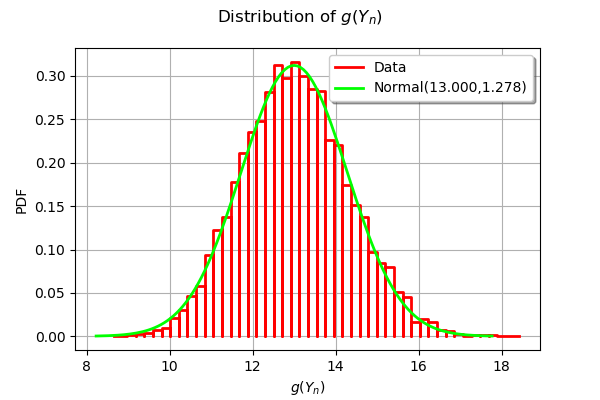

In [12]:
graph = ot.VisualTest_DrawHistogram(t)
graphGExact = gaussGExact.drawPDF()
graphGExact.setColors(["green"])
graph.add(graphGExact)
graph.setLegends(["Data","Normal(%.3f,%.3f)"%(muG,sigmaG)])
graph.setTitle("Distribution of $g(Y_n)$")
graph.setXTitle("$g(Y_n)$")
graph.setYTitle("PDF")
graph